In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns

In [2]:
"""
This is data from PersonageNLG: Style in NLG
The PersonageNLG corpus is a set of 88,000 meaning representation to
natural language utterance pairs in the restaurant domain (train) and 1,390 pairs (test),
"""

personality_df = pd.read_csv("personage-nlg-train.csv")

In [3]:
"""
Restaurant domain
NLG dataset from The {E2E} Dataset: New Challenges for End-to-End Generation
url: https://arxiv.org/abs/1706.09254}

mr – textual meaning representation (MR)
ref – corresponding natural language utterance (human reference)
"""

e2e_df = pd.read_csv("NLG_E2E_Compositional.csv")

In [11]:
e2e_df.isnull().sum()

mr     0
ref    0
dtype: int64

In [12]:
e2e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4693 entries, 0 to 4692
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mr      4693 non-null   object
 1   ref     4693 non-null   object
dtypes: object(2)
memory usage: 73.5+ KB


In [14]:
e2e_df.head()

,mr,ref
0,"name[Blue Spice], eatType[coffee shop], area[c...",A coffee shop in the city centre area called B...
1,"name[Blue Spice], eatType[coffee shop], area[c...",Blue Spice is a coffee shop in city centre.
2,"name[Blue Spice], eatType[coffee shop], area[r...",There is a coffee shop Blue Spice in the river...
3,"name[Blue Spice], eatType[coffee shop], area[r...","At the riverside, there is a coffee shop calle..."
4,"name[Blue Spice], eatType[coffee shop], custom...",The coffee shop Blue Spice is based near Crown...


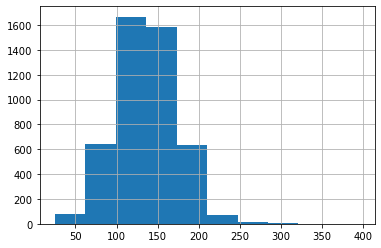

In [15]:
#characters in reference string hist
e2e_df['ref'].str.len().hist()

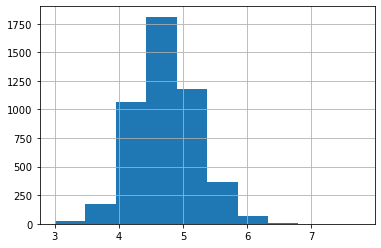

In [34]:
# words per sentence
e2e_df['ref'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [41]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anniecui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
corpus=[]
new= e2e_df['ref'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

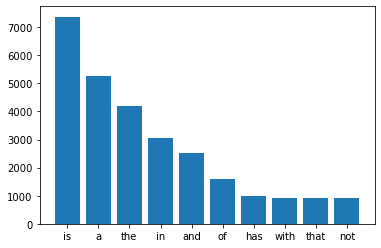

In [47]:
# Most frequently occuring stop words
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

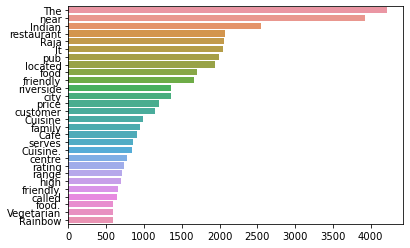

In [52]:
# Most frequently occuring wordss
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)